https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

2022-10-31 10:29:36.173905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-31 10:29:36.300216: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-31 10:29:36.327601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x8

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.10.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)


10000

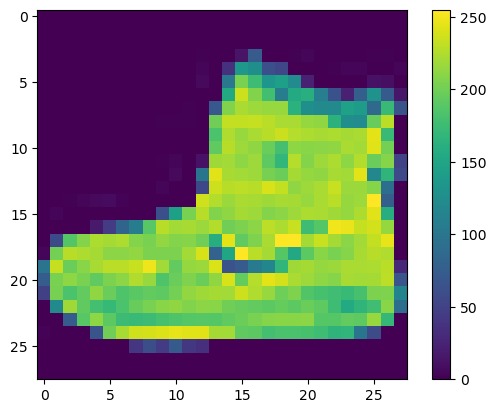

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0


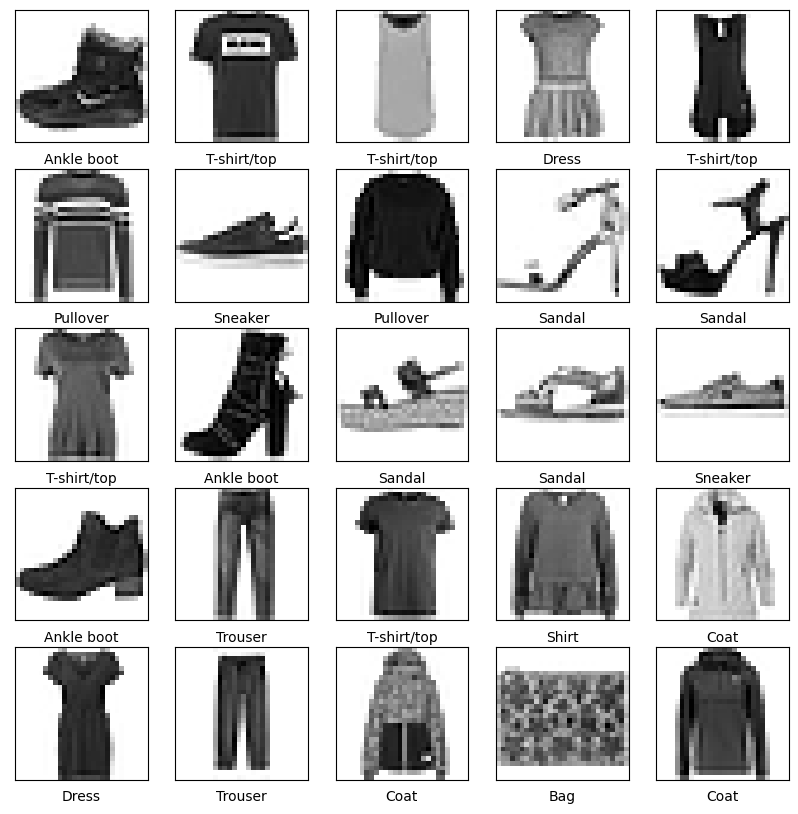

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


2022-10-31 10:31:34.176309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 10:31:34.176439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2022-10-31 10:31:34.176490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2022

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1s 587us/step - loss: 0.4998 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 1s 572us/step - loss: 0.3750 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.3384 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.3116 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 1s 567us/step - loss: 0.2977 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 1s 577us/step - loss: 0.2828 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 1s 594us/step - loss: 0.2713 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 1s 581us/step - loss: 0.2596 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 1s 562us/step - loss: 0.2516 - accuracy: 0.9052
Epoch 10/10
1875/1875 [==============================] - 1s 559u

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3608 - accuracy: 0.8799 - 158ms/epoch - 506us/step

Test accuracy: 0.8798999786376953


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [17]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 309us/step


In [18]:
predictions[0]


array([2.7747340e-08, 1.6201596e-11, 1.3779188e-10, 1.5863960e-09,
       2.1833060e-10, 4.6829988e-05, 1.0489258e-09, 2.1647310e-02,
       1.8230537e-08, 9.7830588e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])


9

In [20]:
test_labels[0]


9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [22]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


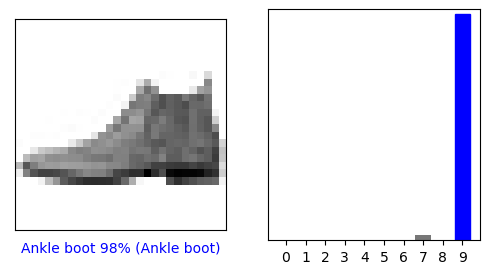

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


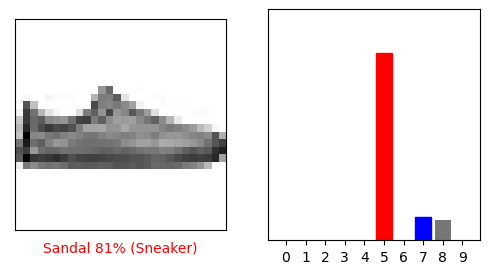

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


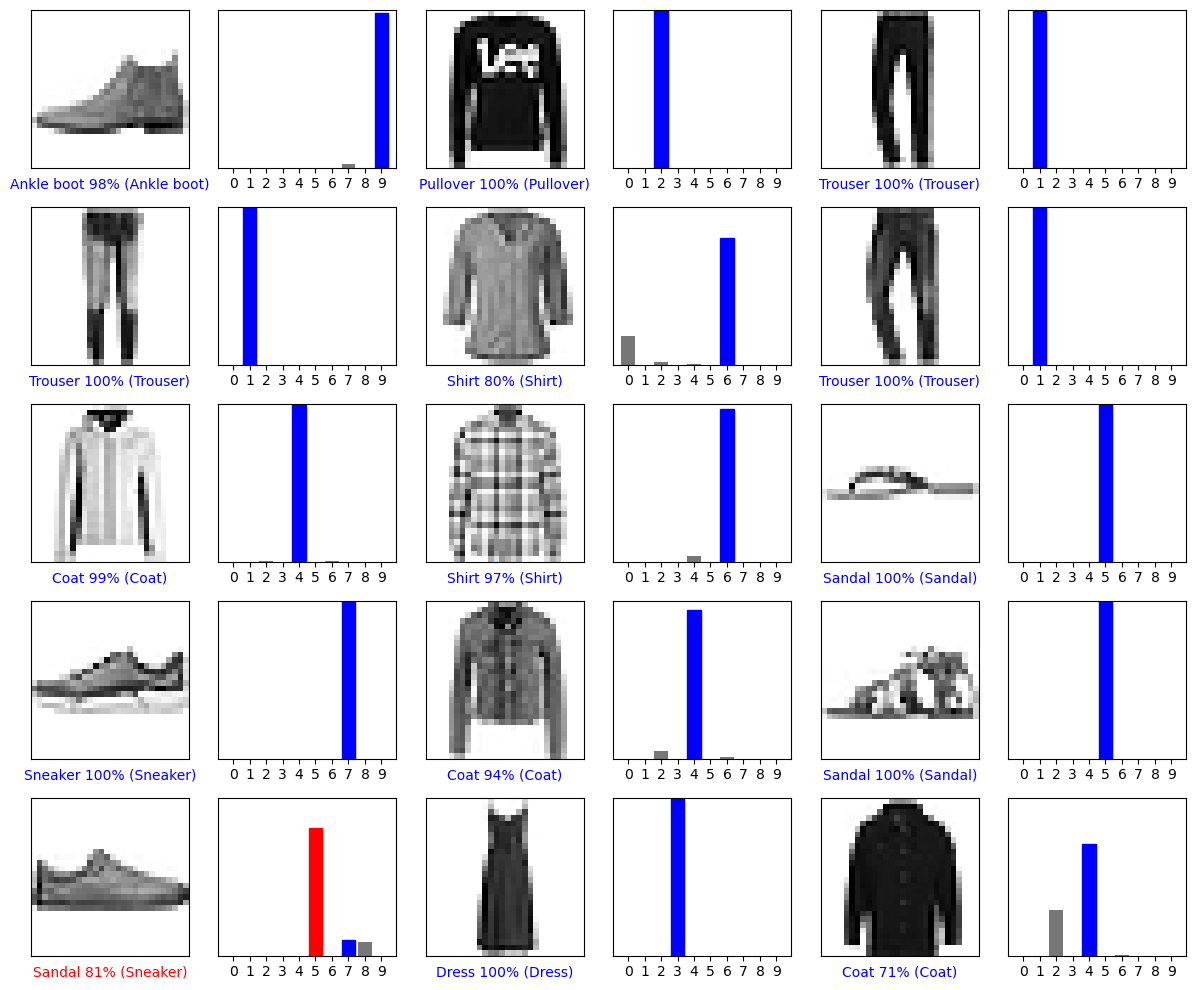

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [26]:
img = test_images[1]

print(img.shape)


(28, 28)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)


1/1 [==============================] - 0s 9ms/step
[[4.7105227e-06 7.1613095e-15 9.9953485e-01 1.5573399e-09 3.2312612e-04
  2.5429466e-14 1.3734118e-04 1.9887445e-12 2.5205074e-10 3.4054617e-14]]


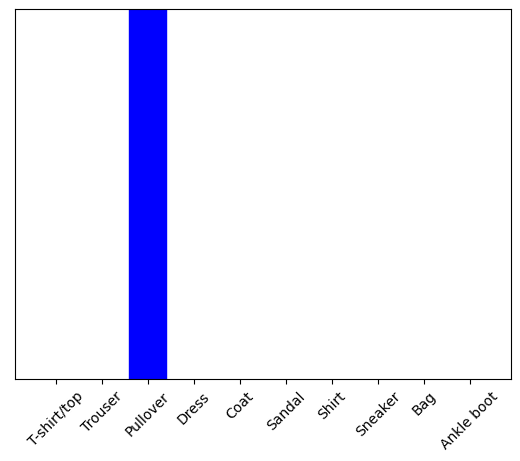

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [30]:
np.argmax(predictions_single[0])


2